In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [353]:
logins = pd.read_json('logins.json')

# Make a separate DataFrame for later analysis of weekday
log_week = logins.copy(deep=True)


logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [354]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Count logins for each 15 minute interval.

In [355]:
logins['logins_count'] = np.zeros(shape=(len(logins), 1))
log_counts.head()

,login_time,logins_count
0,1970-01-01 20:13:18,0.0
1,1970-01-01 20:16:10,0.0
2,1970-01-01 20:16:37,0.0
3,1970-01-01 20:16:36,0.0
4,1970-01-01 20:26:21,0.0


In [356]:
logins.set_index('login_time', inplace=True)

In [357]:
# Convert the timestamps to 15 minute buckets
logins = pd.DataFrame(logins.resample('15T').count())

In [358]:
logins.head()

,logins_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [359]:
logins.index.min()

Timestamp('1970-01-01 20:00:00', freq='15T')

In [360]:
logins.index.max()

Timestamp('1970-04-13 18:45:00', freq='15T')

In [361]:
# Create a column with the mean logins by hour
logins['avg_logins'] = logins.resample('H').mean()

In [362]:
logins.head()

,logins_count,avg_logins
login_time,,
1970-01-01 20:00:00,2,6.00
1970-01-01 20:15:00,6,NaN
1970-01-01 20:30:00,9,NaN
1970-01-01 20:45:00,7,NaN
1970-01-01 21:00:00,1,2.25


In [363]:
hourly = logins.dropna()

In [364]:
hourly.drop(['logins_count'], axis=1, inplace=True)
hourly.head()

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,avg_logins
login_time,
1970-01-01 20:00:00,6.00
1970-01-01 21:00:00,2.25
1970-01-01 22:00:00,5.25
1970-01-01 23:00:00,14.50
1970-01-02 00:00:00,13.25


In [365]:
# Get the average logins by hour
logins_by_hour = hourly['avg_logins'].groupby(hourly['avg_logins'].index.hour).mean()
logins_by_hour

login_time
0     14.688725
1     15.482843
2     14.215686
3     11.840686
4     12.338235
5      7.218137
6      2.789216
7      1.997549
8      2.004902
9      3.742647
10     7.509804
11    14.213235
12    12.166667
13     8.850490
14     8.397059
15     7.446078
16     6.941176
17     6.333333
18     7.303922
19     8.007426
20    10.056373
21    13.781863
22    16.193627
23    14.848039
Name: avg_logins, dtype: float64

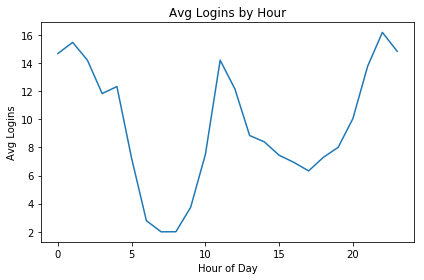

In [366]:
plt.plot(logins_by_hour.index, logins_by_hour)
plt.xlabel('Hour of Day')
plt.ylabel('Avg Logins')
plt.title('Avg Logins by Hour')
plt.tight_layout()

Text(0.5, 1.0, 'Average Signups by Date')

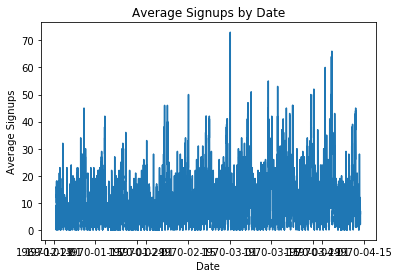

In [367]:
plt.plot(logins.index, logins['logins_count'])
plt.xlabel('Date')
plt.ylabel('Average Signups')
plt.title('Average Signups by Date')

In [368]:
# Breakdown of weekdays using timestamps
weekday = []

for index, row in log_week.iterrows():
    weekday.append(row[0].weekday())

log_week['weekday'] = weekday
log_week.head()

,login_time,weekday
0,1970-01-01 20:13:18,3
1,1970-01-01 20:16:10,3
2,1970-01-01 20:16:37,3
3,1970-01-01 20:16:36,3
4,1970-01-01 20:26:21,3


In [369]:
name = []

for index, row in log_week.iterrows():
    if row['weekday'] == 0:
        name.append('Monday')
    elif row['weekday'] == 1:
        name.append('Tuesday')
    elif row['weekday'] == 2:
        name.append('Wednesday')
    elif row['weekday'] == 3:
        name.append('Thursday')
    elif row['weekday'] == 4:
        name.append('Friday')
    elif row['weekday'] == 5:
        name.append('Saturday')
    else:
        name.append('Sunday')

log_week['weekday_name'] = name
log_week.head()

,login_time,weekday,weekday_name
0,1970-01-01 20:13:18,3,Thursday
1,1970-01-01 20:16:10,3,Thursday
2,1970-01-01 20:16:37,3,Thursday
3,1970-01-01 20:16:36,3,Thursday
4,1970-01-01 20:26:21,3,Thursday


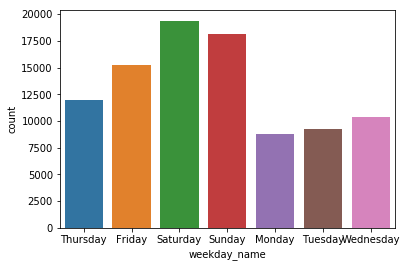

In [370]:
sns.countplot(log_week['weekday_name'])

Checking data quality...

The timestamps for logins begin on '1970-01-01' which would suggest that there was an error in how logins are being recorded. The timestamps would need to be offset to the correct day/time.

Otherwise, the quality is good. There do not appear to be any missing data, or any other problems with the date format.